In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


test.csv
train.csv



In [2]:
train_df = pd.read_csv("../input/train.csv")
train_df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
batch_size = 128
num_classes = 10
epochs = 5
img_rows, img_cols = 28, 28

y_train = keras.utils.to_categorical(train_df.label.values, num_classes)
print("y_train: ", y_train.shape)

x_train = np.array([row.reshape((img_rows, img_cols, 1)) 
           for row in train_df.drop('label', axis=1, inplace=False).values])
print("x_train: ", x_train.shape)

y_train:  (42000, 10)
x_train:  (42000, 28, 28, 1)


In [4]:
def model(input_shape):
    x_input = Input(input_shape)
    
    x = Conv2D(20, (5, 5), strides = (1, 1), name = 'conv0')(x_input)
    x = BatchNormalization(axis = 3, name = 'bn0')(x)
    x = Activation('relu')(x)
    
    x = MaxPooling2D((2, 2), strides = (2,2), name='max_pool0')(x)
    
    x = Conv2D(25, (3, 3), strides = (1, 1), padding="same", name = 'conv1')(x)
    x = BatchNormalization(axis = 3, name = 'bn1')(x)
    x = Activation('relu')(x)
    
    x = MaxPooling2D((3, 3), strides = (2,2), name='max_pool1')(x)
    
    x = Conv2D(30, (1, 1), strides = (1, 1), padding="same", name = 'conv2')(x)
    x = BatchNormalization(axis = 3, name = 'bn2')(x)
    x = Activation('relu')(x)
    
    x = Dropout(0.25)(x)
    
    x = Flatten()(x)
    
    x = Dense(128, activation='relu', name='fc0')(x)
    
    x = Dropout(0.5)(x)
    
    x = Dense(num_classes, activation='softmax', name='fc1')(x)
    
    return Model(inputs = x_input, outputs = x, name='MNIST')

In [5]:
input_shape = (img_rows, img_cols, 1)

mnistmodel = model(input_shape)
mnistmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 24, 24, 20)        520       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 24, 24, 20)        80        
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 20)        0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 12, 12, 20)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 12, 12, 25)        4525      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 12, 12, 25)        100       
__________

In [6]:
mnistmodel.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = mnistmodel.fit(x_train,
               y_train,
               epochs=epochs,
               batch_size=batch_size)

Epoch 1/5
42000/42000 [==============================] - 31s 750us/step - loss: 0.2844 - acc: 0.9107
Epoch 2/5
42000/42000 [==============================] - 34s 802us/step - loss: 0.0969 - acc: 0.9710
Epoch 3/5
42000/42000 [==============================] - 33s 794us/step - loss: 0.0746 - acc: 0.9775
Epoch 4/5
42000/42000 [==============================] - 33s 795us/step - loss: 0.0652 - acc: 0.98081s - loss: 0.065
Epoch 5/5
42000/42000 [==============================] - 33s 778us/step - loss: 0.0585 - acc: 0.9822


dict_keys(['loss', 'acc'])


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


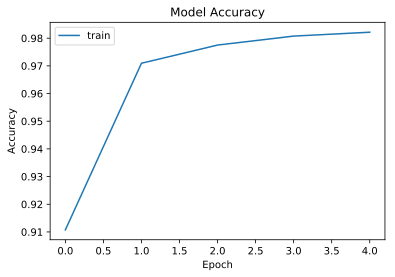

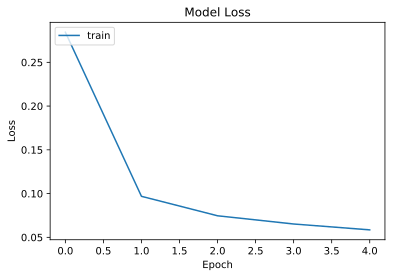

In [8]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [9]:
test_df = pd.read_csv("../input/test.csv")
test_df.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
x_test = np.array([row.reshape((img_rows, img_cols, 1)) 
           for row in test_df.values])
print("x_train: ", x_train.shape)

x_train:  (42000, 28, 28, 1)


In [11]:
classes = mnistmodel.predict(x_test, batch_size=batch_size)

In [12]:
predictions = [list(pred).index(max(pred)) for pred in classes]
predictions = pd.DataFrame(predictions, columns=["Label"])

predictions.head(5)

predictions.to_csv("submission.csv")
print(check_output(["ls", "."]).decode("utf8"))

cnn_notebook.ipynb
submission.csv

